<a href="https://colab.research.google.com/github/lukfr/BAB/blob/master/%5CUebungen%5C04Einf%C3%BChrung_Prognosemodelle%5CCopy_of_credit_scoring_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit scoring

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 891 kB/s 


## Data understanding
### Importing and summarizing

In [3]:
df = pd.read_csv('/content/SouthGermanCredit.asc', sep=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [4]:
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [5]:
df.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


## Data exploration
Check the [seaborn tutorial](https://seaborn.pydata.org/tutorial.html) for suitable plots and function definitions

### Single variables

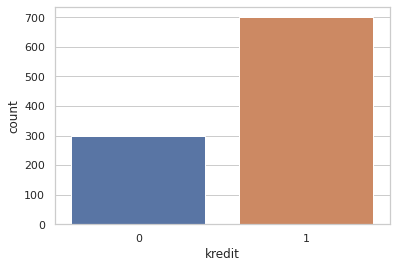

In [ ]:
sns.countplot(
    data = df, 
    x = 'kredit'
)

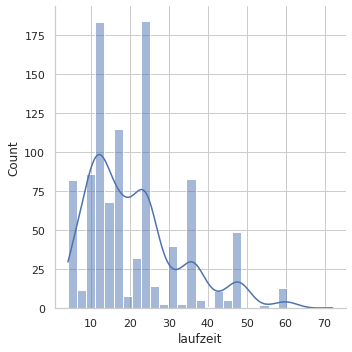

In [ ]:
sns.displot(
    data = df, 
    x = 'laufzeit',
    kde = True
)

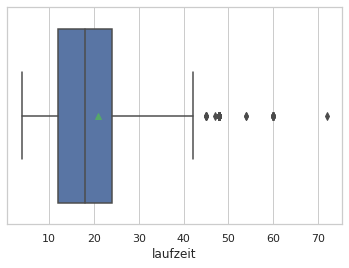

In [ ]:
sns.boxplot(
    data = df,
    x = 'laufzeit',
    showmeans = True
)

### Relationships between variables: association betweeen predictors and target variable

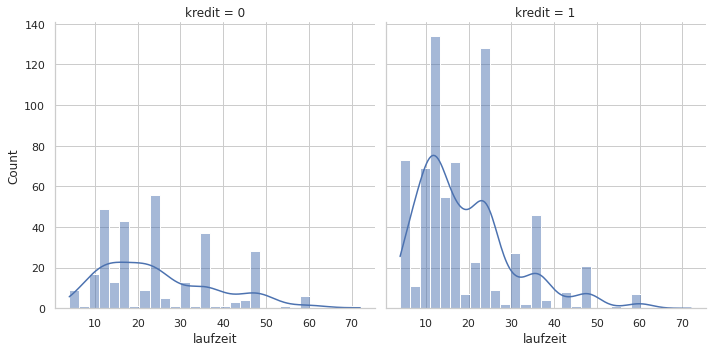

In [ ]:
sns.displot(
    data = df, 
    x = 'laufzeit',
    col = 'kredit',
    kde = True
)

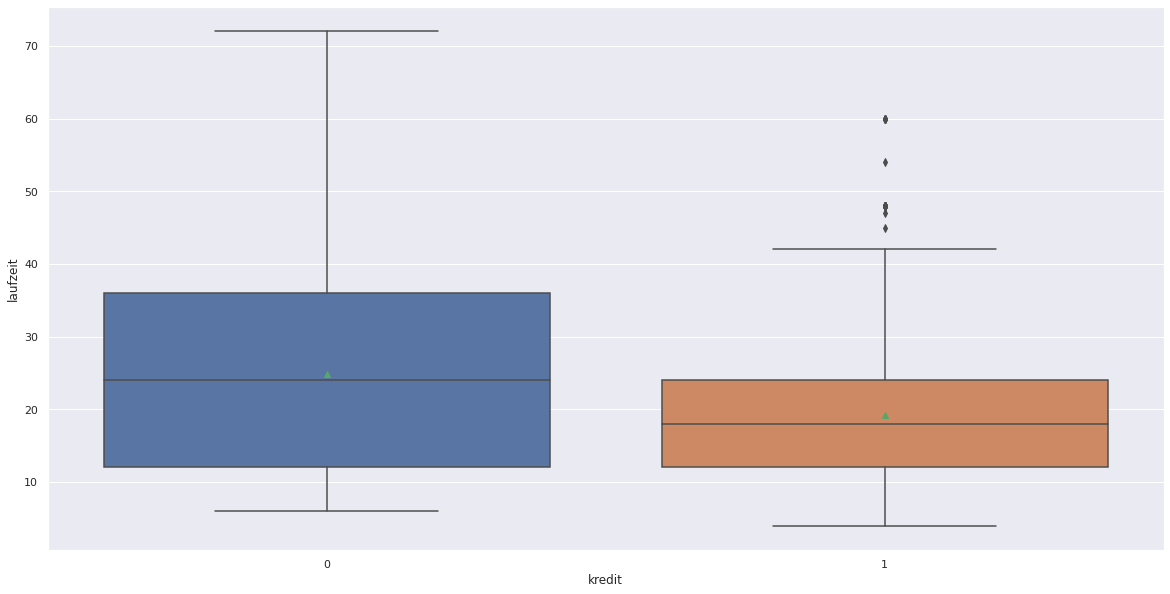

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

sns.boxplot(
    data = df,
    y = 'laufzeit',
    x = 'kredit',
    showmeans=True
)
plt.show()

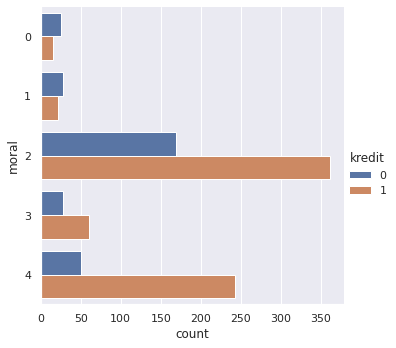

In [ ]:
sns.catplot(
    data = df,
    y = 'moral',
    hue = 'kredit',
    kind = 'count'
)

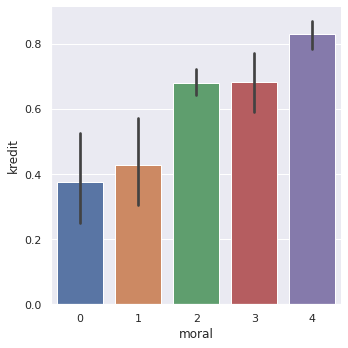

In [ ]:
sns.catplot(
    data = df,
    x = 'moral',
    y = 'kredit',
    kind = 'bar'
)

### Aufgabe
Visualisieren Sie den Zusammenhang zwischen der Zielvariablen und ausgewählten Eingabevariablen. Wählen Sie unterschiedliche Visualisierungstypen abhängig davon, ob es sich um numerische oder kategorische Variablen handelt.

Interpretieren Sie Ihre Visualisierungen.

## Informative features: calculating entropy and information gain

### Functions

In [ ]:
def entropy(target_column):
    """
        computes -sum_i p_i * log_2 (p_i) for each i
    """
    # get the relative frequencies of each target value
    p_i = target_column.value_counts(normalize=True)
    # p_i * log_2 (p_i)
    entropy_components = p_i * np.log2(p_i)
    # return negative sum
    return - entropy_components.sum()

def information_gain(df, info_column, target_column, threshold):
    """
        computes H(target) - H(target | info > thresh) - H(target | info <= thresh)
    """
    # split data
    data_above_thresh = df[df[info_column] > threshold]
    data_below_thresh = df[df[info_column] <= threshold]
    # get entropy
    H = entropy(df[target_column])
    entropy_above = entropy(data_above_thresh[target_column])
    entropy_below = entropy(data_below_thresh[target_column])
    # compute weighted average
    ct_above = len(data_above_thresh)
    ct_below = len(data_below_thresh)
    tot = len(df)
    return H - entropy_above*ct_above/tot - entropy_below*ct_below/tot

### Check guessed threshold on duration

In [ ]:
threshold = 20
prior_entropy = entropy(df['kredit'])
IG = information_gain(df, 'laufzeit', 'kredit', threshold)
print ("IG of %.4f using a threshold of %.2f given a prior entropy of %.4f" % (IG, threshold, prior_entropy))

IG of 0.0153 using a threshold of 20.00 given a prior entropy of 0.8813


### Check all possible thresholds on duration for maximum information gain

In [ ]:
def best_threshold(df, info_column, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0
    l = []

    for thresh in df[info_column].unique():
        IG = criteria(df, info_column, target_column, thresh)
        if IG > maximum_ig:
            maximum_ig = IG
            maximum_threshold = thresh
        
        l.append([thresh, IG])
    return (maximum_threshold, maximum_ig, l)

the maximum IG we can achieve splitting on weight is 0.0233 using a thresh of 15.00


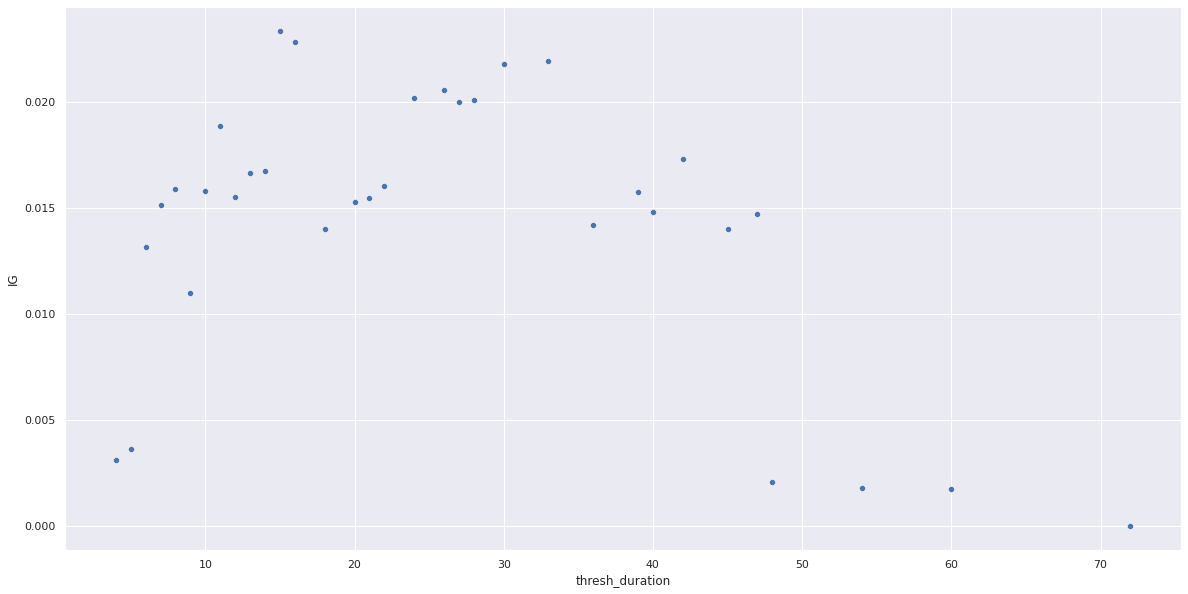

In [ ]:
maximum_threshold, maximum_ig, list_ig = best_threshold(df, 'laufzeit', 'kredit')

print ("the maximum IG we can achieve splitting on weight is %.4f using a thresh of %.2f" % (maximum_ig, maximum_threshold))

df_plot = pd.DataFrame(list_ig, columns=['thresh_duration', 'IG'])
sns.scatterplot(x="thresh_duration", y="IG", data=df_plot)

### Determine feature with most effective split

In [ ]:
def best_split(df, info_columns, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0
    maximum_column = ""
    l = []
    
    for info_column in info_columns:
        thresh, ig, x = best_threshold(df, info_column, target_column, criteria)
                       
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = thresh
            maximum_column = info_column          
        
        l.append([info_column, ig])
    return maximum_column, maximum_threshold, maximum_ig, l

The best column to split on is laufkont giving us a IG of 0.0872 using a thresh of 2.00


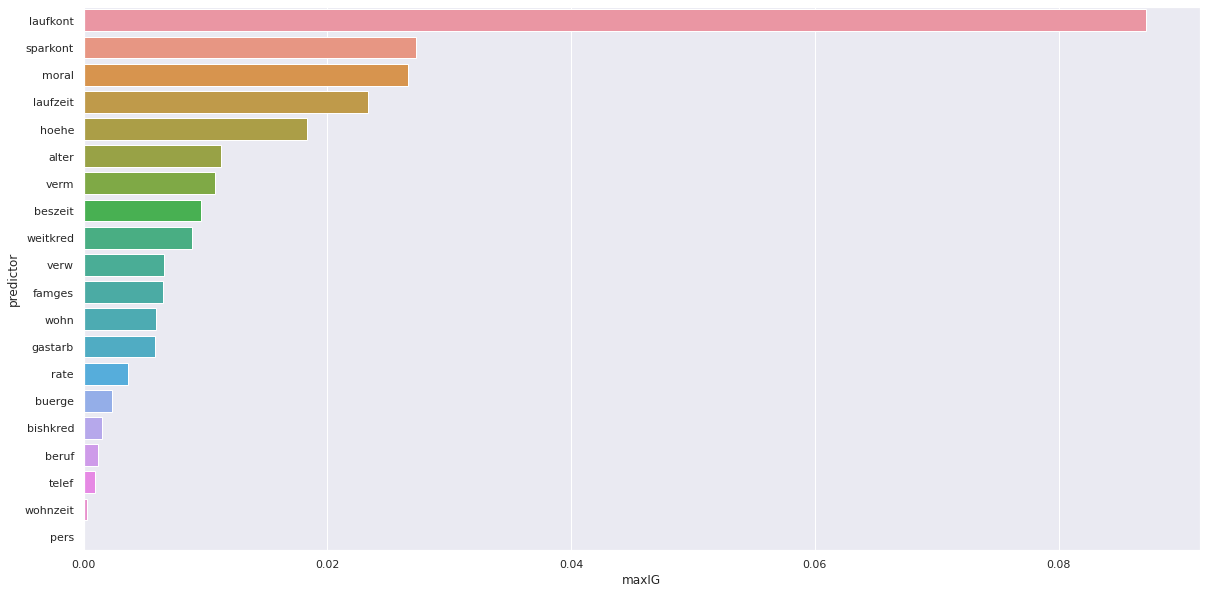

In [ ]:
predictors = df.drop(columns='kredit').columns

max_col, max_threshold, max_ig, list_ig = best_split(df, predictors, 'kredit')

print ("The best column to split on is %s giving us a IG of %.4f using a thresh of %.2f" % (max_col, max_ig, max_threshold))

df_plot = pd.DataFrame(list_ig, columns=['predictor', 'maxIG'])
sns.barplot(
    y="predictor",
    x="maxIG",
    data=df_plot.sort_values(by = 'maxIG', ascending = False)
)

## Modeling: Classifier tree (recursive splitting)

* splitting the data one time sometimes isn't enough to make accurate categorical predictions
* "decision tree classifiers" or "classifier trees" continue to split the data recursively, building a tree-structured model that may give better results

### Build classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns='kredit')
y = df['kredit']

classifier = DecisionTreeClassifier(
    criterion='entropy',
    max_depth = 3
)

classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Predict class and class probabilities

In [ ]:
# real values
df.loc[1:10, 'kredit']

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: kredit, dtype: int64

In [ ]:
# class predictions
classifier.predict(df.loc[1:10, predictors])

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
# class probabilities
classifier.predict_proba(df.loc[1:10, predictors])

array([[0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.3057554 , 0.6942446 ],
       [0.12820513, 0.87179487],
       [0.62244898, 0.37755102],
       [0.3057554 , 0.6942446 ]])

### Visualize tree
#### sklearn

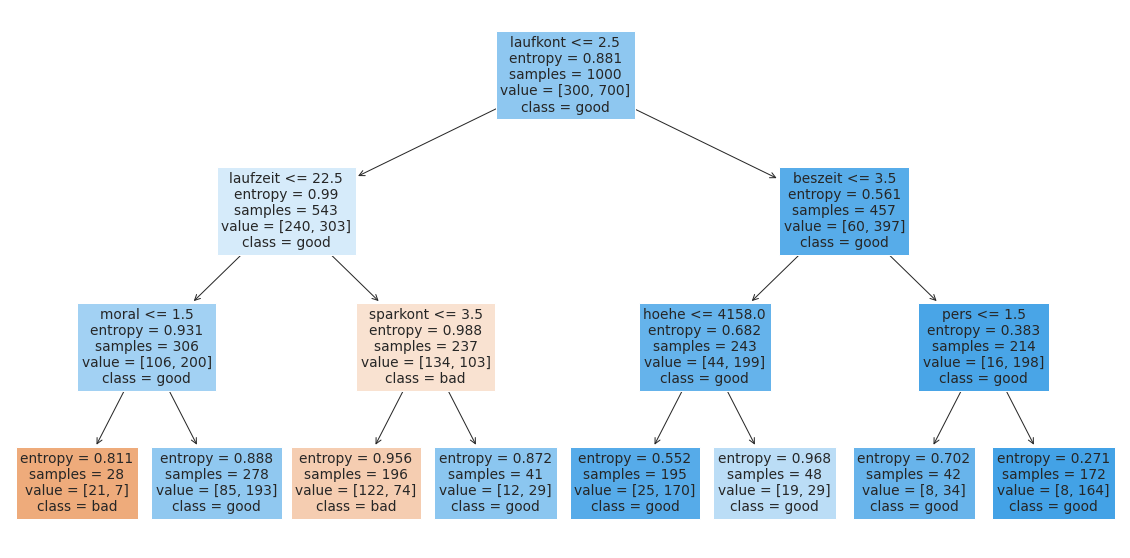

In [ ]:
from sklearn import tree

_ = tree.plot_tree(
    decision_tree=classifier,
    feature_names=X.columns,
    class_names = ['bad', 'good'],
    max_depth = 3,
    proportion=False,
    filled = True
)

#### dtreeviz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


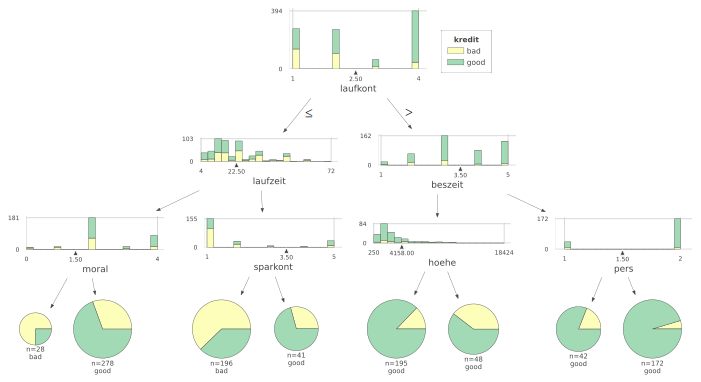

In [ ]:
from dtreeviz.trees import *

viz = dtreeviz(
    tree_model=classifier,
    x_data=df[predictors],
    y_data=df['kredit'],
    target_name = 'kredit',
    feature_names = predictors,
    class_names = ['bad', 'good']
)

viz

### Show rules of tree

In [ ]:
from sklearn.tree import export_text

rules = export_text(
    decision_tree=classifier,
    feature_names=list(X.columns)
)

print(rules)

|--- laufkont <= 2.50
|   |--- laufzeit <= 22.50
|   |   |--- moral <= 1.50
|   |   |   |--- class: 0
|   |   |--- moral >  1.50
|   |   |   |--- class: 1
|   |--- laufzeit >  22.50
|   |   |--- sparkont <= 3.50
|   |   |   |--- class: 0
|   |   |--- sparkont >  3.50
|   |   |   |--- class: 1
|--- laufkont >  2.50
|   |--- beszeit <= 3.50
|   |   |--- hoehe <= 4158.00
|   |   |   |--- class: 1
|   |   |--- hoehe >  4158.00
|   |   |   |--- class: 1
|   |--- beszeit >  3.50
|   |   |--- pers <= 1.50
|   |   |   |--- class: 1
|   |   |--- pers >  1.50
|   |   |   |--- class: 1



### Visualize decision surface for variables 'laufkont' and 'laufzeit'

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


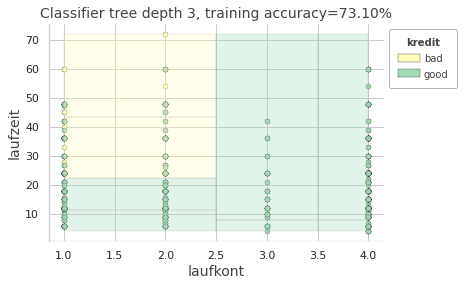

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import ctreeviz_bivar

X = df[['laufkont','laufzeit']]
y = df['kredit']

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(X, y)

ct = ctreeviz_bivar(
    tree_model=dt,
    x_data=X,
    y_data=y,
    feature_names = ['laufkont','laufzeit'],
    class_names = ['bad','good'],
    target_name='kredit'
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


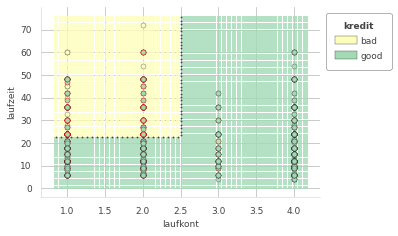

In [ ]:
from dtreeviz.classifiers import clfviz

X = df[['laufkont','laufzeit']]
y = df['kredit']

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(X, y)

clfviz(
    model=dt,
    X=X,
    y=y,
    show=['instances', 'boundaries', 'misclassified', 'legend'],
    feature_names=['laufkont', 'laufzeit'],
    target_name='kredit',
    class_names=['bad', 'good'],
    sigma=1,
    yshift=1
)

## Evaluation

### Aufgabe

Die Prognosegenauigkeit (*Accuracy*) ist ein erster Ansatz zur Beurteilung der Güte unseres Modells. Sie ist definiert als:

$$\text{Prognosegenauigkeit} = \frac{\text{Anzahl richtig klassifizierter Objekte}}{\text{Gesamtanzahl der Objekte}}$$

Berechnen Sie die Prognosegenauigkeit des Entscheidungsbaums auf dem verwendeten Datensatz.

## Aufgabe
* Kodieren Sie die nominalen Variablen des Datensatzes als Dummy-Variablen. Verwenden Sie hierfür die Funktion `DataFrame.get_dummies`
* Trainieren Sie einen `DecisionTreeClassifier` auf den neu kodierten Daten
* Visualisieren Sie den gelernten Entscheidungsbaum und interpretieren Sie die Darstellung.